In [10]:
import pandas as pd
import numpy as np

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go

pyo.init_notebook_mode(connected=True)

import cufflinks as cf

# import plotly.tools as tls
# tls.embed('https://plot.ly/~cufflinks/8')

In [13]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [14]:
# plt.style.use('seaborn-ticks')

-----------

# Gewerbe: Leerflächen in der Stadt Zürich

### Auswertung
Wie gross ist der Anteil der leerstehenden Flächen für Gewerbe wie Büros, Praxis, Verkauf und Lager usw.


### Leerfläche in Quadratmeter
* Leerfläche der ganzen Stadt Zürich von 2014 bis 2018
* Leerfläche in den Kreisen der Stadt Zürich von 2014 bis 2018
* Leerfläche in den Kreisen der Stadt Zürich im Jahr 2018
* Leerfläche in den Quartieren der Stadt Zürich von 2014 bis 2018
* Leerfläche in den Quartieren der Stadt Zürich im Jahr 2018

### Leerfläche nach Nutzungsart
* Leerfläche nach Nutzungsart –  Stadt Zürich im Jahr 2018
* Leerfläche nach Nutzungsart in den Kreisen im Jahr 2018
* Leerfläche nach Nutzungsart in den Quartieren im Jahr 2018

Quelle: Statistik Stadt Zürich

-------------

### Datensatz "gesäubert"

Dieser Datensatz kann nun für die Datenauswertung verwendet werden

In [15]:
df_clean = pd.read_excel('Daten/Gewerbe/01_Leerflächen_Gewerbe_Art_Quartier_clean.xlsx').fillna(0)

In [16]:
df_clean.head()

,Quartier,Leerfläche 2018,Leerfläche 2017,Leerfläche 2016,Leerfläche 2015,Leerfläche 2014,Büro/Praxis 2018,Büro/Praxis 2017,Büro/Praxis 2016,Büro/Praxis 2015,Büro/Praxis 2014,Lager/Archiv 2018,Verkauf 2018,Werkstatt/Produktion 2018,Andere Nutzungen 2018
0,Ganze Stadt,187714,243660,237054,256450,264548,139664,174381,193027,207901,214900,31663,5381,5122,5884
1,Kreis 1,30550,34710,32201,40945,53774,23805,29535,29807,36180,49692,2436,1889,214,2206
2,Rathaus,3504,1940,2261,2261,2284,1399,1940,1315,2113,1856,128,383,64,1530
3,Hochschulen,670,1187,340,126,2218,670,797,340,126,2218,0,0,0,0
4,Lindenhof,7542,10304,8060,7737,7381,6963,8158,7725,7374,6967,579,0,0,0


------------

## Gewerbe: Leerfläche aller Kreise, Quartiere und der ganzen Stadt Zürich von 2014 bis 2018

Datenauswahl "df_leerflaeche" ist Referenzsatz für die Selektion der Kreise, Quartiere etc.

In [17]:
# selecting [rows, columns]
df_leerflaeche = df_clean.iloc[0:, [0,1,2,3,4,5]]
df_leerflaeche

,Quartier,Leerfläche 2018,Leerfläche 2017,Leerfläche 2016,Leerfläche 2015,Leerfläche 2014
0,Ganze Stadt,187714,243660,237054,256450,264548
1,Kreis 1,30550,34710,32201,40945,53774
2,Rathaus,3504,1940,2261,2261,2284
3,Hochschulen,670,1187,340,126,2218
4,Lindenhof,7542,10304,8060,7737,7381
5,City,18834,21279,21540,30821,41891
6,Kreis 2,23200,25173,19439,30347,34236
7,Wollishofen,2220,4227,5313,3790,9101
8,Leimbach,0,0,0,0,401
9,Enge,20980,20946,14126,26557,24734


-------

### Gewerbe: Leerfläche der ganzen Stadt Zürich von 2014 bis 2018

In [18]:
# selecting [rows, columns]
df_leerflaeche_stdzh = df_leerflaeche.iloc[:1, :]
df_leerflaeche_stdzh

,Quartier,Leerfläche 2018,Leerfläche 2017,Leerfläche 2016,Leerfläche 2015,Leerfläche 2014
0,Ganze Stadt,187714,243660,237054,256450,264548


In [19]:
# renaming columns before transposing the dataframe
df_leerflaeche_stdzh = df_leerflaeche_stdzh.rename(columns={'Quartier': 'Quartier',
                                             'Leerfläche 2018': '2018',
                                             'Leerfläche 2017': '2017',
                                             'Leerfläche 2016': '2016',
                                             'Leerfläche 2015': '2015',
                                             'Leerfläche 2014': '2014'})
df_leerflaeche_stdzh

,Quartier,2018,2017,2016,2015,2014
0,Ganze Stadt,187714,243660,237054,256450,264548


In [20]:
# transposing dataframe
df_leerflaeche_stdzh = df_leerflaeche_stdzh.transpose()
df_leerflaeche_stdzh

,0
Quartier,Ganze Stadt
2018,187714
2017,243660
2016,237054
2015,256450
2014,264548


In [21]:
df_leerflaeche_stdzh.dtypes

0    object
dtype: object

In [22]:
# exporting dataframe to convert data type, reset index and change header
df_leerflaeche_stdzh.to_excel('Daten/Gewerbe/leerflaeche_stdzh_processing_01.xlsx')

In [23]:
# reading exported dataframe
df_leerflaeche_stdzh = pd.read_excel('Daten/Gewerbe/leerflaeche_stdzh_processing_01.xlsx', header=1)
df_leerflaeche_stdzh

,Quartier,Ganze Stadt
0,2018,187714
1,2017,243660
2,2016,237054
3,2015,256450
4,2014,264548


In [24]:
# data type has changed to int
df_leerflaeche_stdzh.dtypes

Quartier       int64
Ganze Stadt    int64
dtype: object

In [25]:
# renaming columns
df_leerflaeche_stdzh = df_leerflaeche_stdzh.rename(columns={'Quartier' : 'Jahr', 'Ganze Stadt' : 'Leerfläche'})
df_leerflaeche_stdzh

,Jahr,Leerfläche
0,2018,187714
1,2017,243660
2,2016,237054
3,2015,256450
4,2014,264548


------------

### Color palette Master

In [26]:
# colors can be copyed
color_palette = ['#2884B2', '#51ADFF', '#7BC1E7', '#B21310', '#FF6839']

trace = go.Bar(x=df_leerflaeche_stdzh['Jahr'], y=df_leerflaeche_stdzh['Leerfläche'],
            marker=dict(color=color_palette))
data = [trace]

layout = go.Layout(
    title='Color Palette',
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
    autosize=False, width=600,height=300,
    xaxis=dict(showticklabels=False),
    yaxis=dict(showticklabels=False)
)    
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='bar2.html')

---------

In [27]:
# ploting with plotly
color_palette_stdzh = ['#FF6839', '#51ADFF', '#51ADFF', '#51ADFF', '#51ADFF']

trace = go.Bar(
            x=df_leerflaeche_stdzh['Jahr'],
            y=df_leerflaeche_stdzh['Leerfläche'],
            marker=dict(
            color=color_palette_stdzh))
data = [trace]

layout = go.Layout(
    title='Gewerbe: Leerfläche der ganzen Stadt Zürich von 2014 bis 2018',
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
#     autosize=False,
#     width=900,
#     height=600,
    bargroupgap=0.1,
    bargap=0.3,

    xaxis=dict(
        title='Stadt Zürich',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True,
    ),
    
    yaxis=dict(
        title='Fläche in m2',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True
    )
)    
    
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='bar2.html')

In [28]:
# exporting data to excel for further use with Ploly-online, Datawrapper or such
df_leerflaeche_stdzh.to_excel('Daten/Plotly/Gewerbe/01-01_Gewerbe_Leerfläche_Stadt_Zürich_2014-2018.xlsx')

---------

### Gewerbe: Leerfläche in den Kreisen der Stadt Zürich von 2014 bis 2018

In [29]:
# selecting [rows, columns]
df_leerflaeche_kreise = df_leerflaeche.iloc[[1,6,10,14,18,21,24,29,33,36,39,43], :]
df_leerflaeche_kreise.rename(columns={'Quartier': 'Kreise',
                                      'Leerfläche 2018' : '2018',
                                      'Leerfläche 2017' : '2017',
                                      'Leerfläche 2016' : '2016',
                                      'Leerfläche 2015' : '2015',
                                      'Leerfläche 2014' : '2014'}, inplace=True)
df_leerflaeche_kreise

,Kreise,2018,2017,2016,2015,2014
1,Kreis 1,30550,34710,32201,40945,53774
6,Kreis 2,23200,25173,19439,30347,34236
10,Kreis 3,19407,20063,22593,38728,34681
14,Kreis 4,6808,22861,11583,7325,7046
18,Kreis 5,8646,5913,17582,44909,33643
21,Kreis 6,3281,5804,3726,5322,2095
24,Kreis 7,2952,4697,4336,3886,3577
29,Kreis 8,6938,12230,12294,15127,13214
33,Kreis 9,41331,44100,52204,42610,41216
36,Kreis 10,590,1342,477,220,1240


In [30]:
# ploting with plotly
trace1 = go.Bar(x=df_leerflaeche_kreise['Kreise'],
                y=df_leerflaeche_kreise['2018'], name='2018', marker=dict(color='#FF6839'))
trace2 = go.Bar(x=df_leerflaeche_kreise['Kreise'],
                y=df_leerflaeche_kreise['2017'], name='2017', marker=dict(color='#51ADFF'))
trace3 = go.Bar(x=df_leerflaeche_kreise['Kreise'],
                y=df_leerflaeche_kreise['2016'], name='2016', marker=dict(color='#51ADFF'))
trace4 = go.Bar(x=df_leerflaeche_kreise['Kreise'],
                y=df_leerflaeche_kreise['2015'], name='2015', marker=dict(color='#51ADFF'))
trace5 = go.Bar(x=df_leerflaeche_kreise['Kreise'],
                y=df_leerflaeche_kreise['2014'], name='2014', marker=dict(color='#51ADFF'))

data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title='Gewerbe: Leerfläche in den Kreisen der Stadt Zürich von 2014 bis 2018',
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
#     autosize=False,
#     width=900,
#     height=600,
    bargroupgap=0.1,
    bargap=0.2,

    xaxis=dict(
        title='Stadt Zürich',
        titlefont=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True
    ),
    
    yaxis=dict(
        title='Fläche in m2',
        titlefont=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True,
        range=[0, 70000],
        showgrid=True
    )
)    
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='bar2.html')

In [31]:
# exporting data to excel for further use with Ploly-online, Datawrapper or such
df_leerflaeche_kreise.to_excel('Daten/Plotly/Gewerbe/01-02_Gewerbe_Leerfläche_Kreise_2014-2018.xlsx')

----------

### Gewerbe: Leerfläche in den Kreisen der Stadt Zürich im Jahr 2018

In [32]:
# selecting [rows, columns]
df_leerflaeche_kreise_2018=df_leerflaeche_kreise.iloc[:, :2]
df_leerflaeche_kreise_2018

,Kreise,2018
1,Kreis 1,30550
6,Kreis 2,23200
10,Kreis 3,19407
14,Kreis 4,6808
18,Kreis 5,8646
21,Kreis 6,3281
24,Kreis 7,2952
29,Kreis 8,6938
33,Kreis 9,41331
36,Kreis 10,590


In [33]:
# ploting with plotly
color_palette_kreise = ['#51ADFF', '#51ADFF', '#51ADFF', '#51ADFF', '#51ADFF', '#51ADFF',
                       '#51ADFF', '#51ADFF', '#51ADFF', '#51ADFF', '#51ADFF', '#51ADFF']

trace = go.Bar(
            x=df_leerflaeche_kreise_2018['Kreise'],
            y=df_leerflaeche_kreise_2018['2018'],
            marker=dict(
            color=color_palette_kreise))
data = [trace]

layout = go.Layout(
    title='Gewerbe: Leerfläche in den Kreisen der Stadt Zürich im Jahr 2018',
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
    autosize=False,
    width=900,
    height=600,
    bargroupgap=0.1,
    bargap=0.2,

    xaxis=dict(
        title='Kreise Zürich',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True,
    ),
    
    yaxis=dict(
        title='Fläche in m2',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True
    )
)    
    
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='bar2.html')

In [34]:
# exporting data to excel for further use with Ploly-online, Datawrapper or such
df_leerflaeche_kreise_2018.to_excel('Daten/Plotly/Gewerbe/01-03_Gewerbe_Leerfläche_Kreise_2018.xlsx')

---------

###  Gewerbe: Leerfläche in den Quartieren der Stadt Zürich von 2014 bis 2018

In [35]:
# selecting [rows, columns]
df_leerflaeche_quartiere = df_leerflaeche.iloc[[2,3,4,5,7,8,9,11,12,13,15,16,17,19,
                                                20,22,23,25,26,27,28,30,31,32,34,35,
                                                37,38,40,41,42,44,45,46], :]
df_leerflaeche_quartiere.head()

,Quartier,Leerfläche 2018,Leerfläche 2017,Leerfläche 2016,Leerfläche 2015,Leerfläche 2014
2,Rathaus,3504,1940,2261,2261,2284
3,Hochschulen,670,1187,340,126,2218
4,Lindenhof,7542,10304,8060,7737,7381
5,City,18834,21279,21540,30821,41891
7,Wollishofen,2220,4227,5313,3790,9101


----------

### Gewerbe: Leerfläche in den Quartieren der Stadt Zürich im Jahr 2018

In [36]:
# selecting [rows, columns]
df_leerflaeche_quartiere_2018 = df_leerflaeche.iloc[[2,3,4,5,7,8,9,11,12,13,15,16,17,19,
                                                20,22,23,25,26,27,28,30,31,32,34,35,
                                                37,38,40,41,42,44,45,46], :2]
df_leerflaeche_quartiere_2018.head()

,Quartier,Leerfläche 2018
2,Rathaus,3504
3,Hochschulen,670
4,Lindenhof,7542
5,City,18834
7,Wollishofen,2220


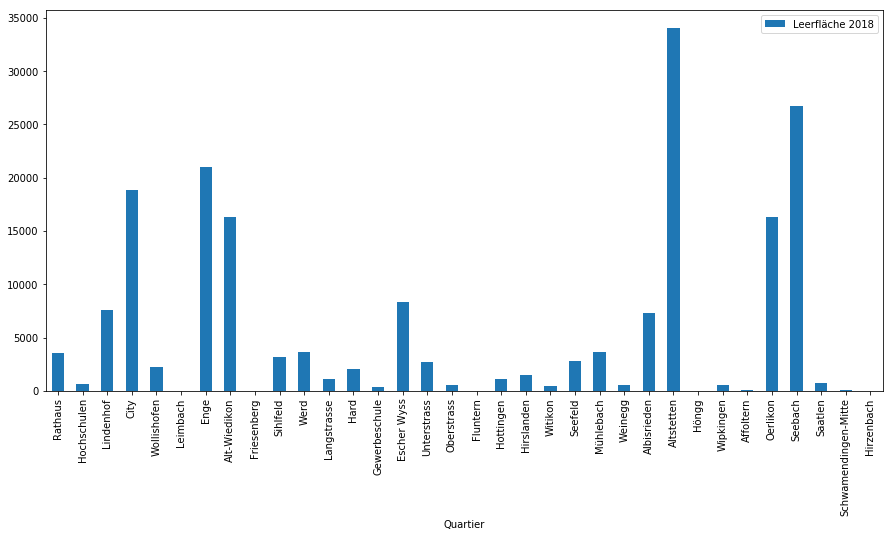

In [37]:
# setting index to 'Quartier' for a quick look with matplotlib
df_leerflaeche_quartiere_2018 = df_leerflaeche_quartiere_2018.set_index('Quartier')
df_leerflaeche_quartiere_2018.plot(kind='bar', figsize=(15,7))

In [38]:
# exporting data to excel for further use with Ploly-online, Datawrapper or such
df_leerflaeche_quartiere_2018.to_excel('Daten/Plotly/Gewerbe/01-04_Gewerbe_Leerfläche_Quartiere_2018.xlsx')

------------

## Gewerbe: Leerfläche nach Nutzungsart –  Kreise, Quartiere und Stadt Zürich im Jahr 2018

In [39]:
# selecting [rows, columns]
df_nutzungsart = df_clean.iloc[0:, [0,6,11,12,13,14]]

In [40]:
df_nutzungsart.head()

,Quartier,Büro/Praxis 2018,Lager/Archiv 2018,Verkauf 2018,Werkstatt/Produktion 2018,Andere Nutzungen 2018
0,Ganze Stadt,139664,31663,5381,5122,5884
1,Kreis 1,23805,2436,1889,214,2206
2,Rathaus,1399,128,383,64,1530
3,Hochschulen,670,0,0,0,0
4,Lindenhof,6963,579,0,0,0


In [41]:
# renaming columns
df_nutzungsart.rename(columns={'Quartier': 'Kreise',
                                      'Büro/Praxis 2018' : 'Büro/Praxis',
                                      'Lager/Archiv 2018' : 'Lager/Archiv',
                                      'Verkauf 2018' : 'Verkauf',
                                      'Werkstatt/Produktion 2018' : 'Werkstatt/Produktion',
                                      'Andere Nutzungen 2018' : 'Andere Nutzungen'}, inplace=True)

In [42]:
# df_nutzungsart ist Rerefenzsatz
df_nutzungsart.head()

,Kreise,Büro/Praxis,Lager/Archiv,Verkauf,Werkstatt/Produktion,Andere Nutzungen
0,Ganze Stadt,139664,31663,5381,5122,5884
1,Kreis 1,23805,2436,1889,214,2206
2,Rathaus,1399,128,383,64,1530
3,Hochschulen,670,0,0,0,0
4,Lindenhof,6963,579,0,0,0


---------------

### Gewerbe: Leerfläche nach Nutzungsart –  Stadt Zürich im Jahr 2018

In [43]:
# selecting [rows, columns]
df_nutzungsart_stdzh = df_nutzungsart.iloc[:1, [0,1,2,3,4,5]]

In [44]:
df_nutzungsart_stdzh

,Kreise,Büro/Praxis,Lager/Archiv,Verkauf,Werkstatt/Produktion,Andere Nutzungen
0,Ganze Stadt,139664,31663,5381,5122,5884


In [45]:
# transpose Dataframe
df_nutzungsart_stdzh = df_nutzungsart_stdzh.transpose()
df_nutzungsart_stdzh

,0
Kreise,Ganze Stadt
Büro/Praxis,139664
Lager/Archiv,31663
Verkauf,5381
Werkstatt/Produktion,5122
Andere Nutzungen,5884


In [46]:
# exporting to excel to change index
df_nutzungsart_stdzh.to_excel('Daten/Gewerbe/nutzungsart_stdzh_processing_01.xlsx')

In [47]:
df_nutzungsart_stdzh = pd.read_excel('Daten/Gewerbe/nutzungsart_stdzh_processing_01.xlsx', header=1)
df_nutzungsart_stdzh

,Kreise,Ganze Stadt
0,Büro/Praxis,139664
1,Lager/Archiv,31663
2,Verkauf,5381
3,Werkstatt/Produktion,5122
4,Andere Nutzungen,5884


In [48]:
# renaming columns
df_nutzungsart_stdzh = df_nutzungsart_stdzh.rename(columns={'Kreise' : 'Nutzungsart', 'Ganze Stadt' : 'Leerfläche'})
df_nutzungsart_stdzh

,Nutzungsart,Leerfläche
0,Büro/Praxis,139664
1,Lager/Archiv,31663
2,Verkauf,5381
3,Werkstatt/Produktion,5122
4,Andere Nutzungen,5884


In [49]:
# ploting with plotly
color_palette_nutzungsart_stdzh = ['#51ADFF', '#51ADFF', '#51ADFF', '#51ADFF', '#51ADFF']

trace = go.Bar(
            x=df_nutzungsart_stdzh['Nutzungsart'],
            y=df_nutzungsart_stdzh['Leerfläche'],
            marker=dict(
            color=color_palette_nutzungsart_stdzh))
data = [trace]

layout = go.Layout(
    title='Gewerbe: Leerfläche nach Nutzungsart –  Stadt Zürich im Jahr 2018',
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
    autosize=False,
    width=900,
    height=600,
    bargroupgap=0.1,
    bargap=0.2,

    xaxis=dict(
        title='Nutzungsart',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True,
    ),
    
    yaxis=dict(
        title='Fläche in m2',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True
    )
)    
    
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='bar2.html')

In [50]:
# exporting data to excel for further use with Ploly-online, Datawrapper or such
df_nutzungsart_stdzh.to_excel('Daten/Plotly/Gewerbe/01-05_Gewerbe_Nutzungsart_Stadt_Zürich_2018.xlsx')

------------

### Gewerbe: Leerfläche nach Nutzungsart in den Kreisen im Jahr 2018

In [51]:
# selecting [rows, columns]
df_nutzungsart_kreise_2018 = df_nutzungsart.iloc[[1,6,10,14,18,21,24,29,33,36,39,43], 0:]

In [52]:
df_nutzungsart_kreise_2018

,Kreise,Büro/Praxis,Lager/Archiv,Verkauf,Werkstatt/Produktion,Andere Nutzungen
1,Kreis 1,23805,2436,1889,214,2206
6,Kreis 2,19520,2687,608,87,298
10,Kreis 3,11823,4202,543,1955,884
14,Kreis 4,4276,2311,88,122,11
18,Kreis 5,4817,3517,167,62,83
21,Kreis 6,2635,232,252,0,162
24,Kreis 7,2302,405,190,0,55
29,Kreis 8,5995,637,64,160,82
33,Kreis 9,29739,7820,747,1353,1672
36,Kreis 10,159,78,353,0,0


In [53]:
# ploting with plotly
trace1 = go.Bar(x=df_nutzungsart_kreise_2018['Kreise'],
                y=df_nutzungsart_kreise_2018['Büro/Praxis'], name='Büro/Praxis', marker=dict(color='#B21310'))

trace2 = go.Bar(x=df_nutzungsart_kreise_2018['Kreise'],
                y=df_nutzungsart_kreise_2018['Lager/Archiv'], name='Lager/Archiv', marker=dict(color='#2884B2'))

trace3 = go.Bar(x=df_nutzungsart_kreise_2018['Kreise'],
                y=df_nutzungsart_kreise_2018['Verkauf'], name='Verkauf', marker=dict(color='#FF6839'))

trace4 = go.Bar(x=df_nutzungsart_kreise_2018['Kreise'],
                y=df_nutzungsart_kreise_2018['Werkstatt/Produktion'], name='Werkstatt/Produktion', marker=dict(color='#51ADFF'))

trace5 = go.Bar(x=df_nutzungsart_kreise_2018['Kreise'],
                y=df_nutzungsart_kreise_2018['Andere Nutzungen'], name='Andere Nutzungen', marker=dict(color='#061324'))

data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title='Gewerbe: Leerfläche nach Nutzungsart in den Kreisen im Jahr 2018',
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
    autosize=False,
    width=1000,
    height=600,
    bargroupgap=0.1,
    bargap=0.2,
    barmode='group',

    xaxis=dict(
        title='Kreise',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True,
    ),
    
    yaxis=dict(
        title='Fläche in m2',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True
    )
)    
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='bar2.html')

In [54]:
# exporting data to excel for further use with Ploly-online, Datawrapper or such
df_nutzungsart_kreise_2018.to_excel('Daten/Plotly/Gewerbe/01-06_Gewerbe_Nutzungsart_Kreise_2018.xlsx')

----------

### Gewerbe: Leerfläche nach Nutzungsart in den Quartieren im Jahr 2018

In [55]:
# selecting [rows, columns]
df_nutzungsart_quartiere = df_nutzungsart.iloc[[2,3,4,5,7,8,9,11,12,13,15,16,17,19,
                                                20,22,23,25,26,27,28,30,31,32,34,35,
                                                37,38,40,41,42,44,45,46], [0,1,2,3,4,5]]
df_nutzungsart_quartiere.head()

,Kreise,Büro/Praxis,Lager/Archiv,Verkauf,Werkstatt/Produktion,Andere Nutzungen
2,Rathaus,1399,128,383,64,1530
3,Hochschulen,670,0,0,0,0
4,Lindenhof,6963,579,0,0,0
5,City,14773,1729,1506,150,676
7,Wollishofen,1741,479,0,0,0


In [56]:
# setting index to column 'Kreise' for a quick look with matplotlib
df_nutzungsart_quartiere = df_nutzungsart_quartiere.set_index('Kreise')
df_nutzungsart_quartiere.head()

,Büro/Praxis,Lager/Archiv,Verkauf,Werkstatt/Produktion,Andere Nutzungen
Kreise,,,,,
Rathaus,1399,128,383,64,1530
Hochschulen,670,0,0,0,0
Lindenhof,6963,579,0,0,0
City,14773,1729,1506,150,676
Wollishofen,1741,479,0,0,0


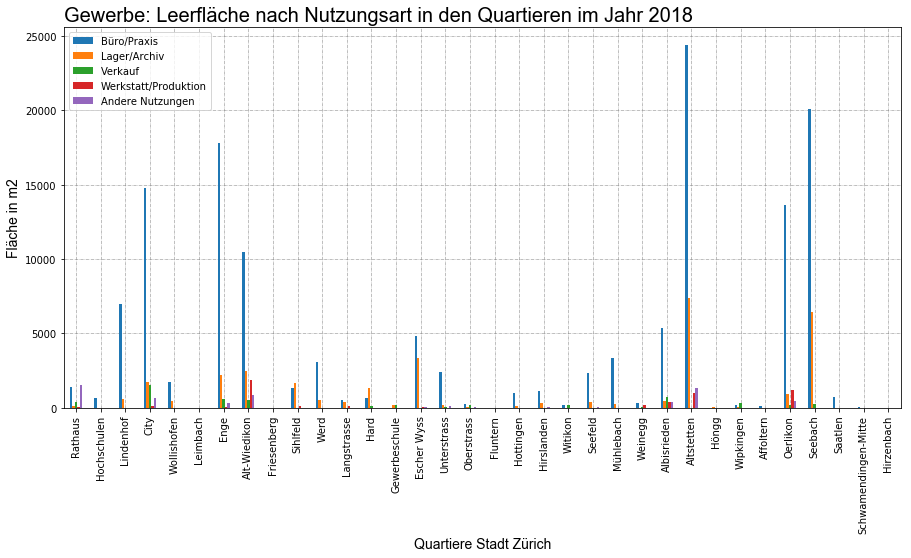

In [57]:
# ploting with matplotlib
fig, ax = plt.subplots()
df_nutzungsart_quartiere.plot(kind='bar', figsize=(15,7), ax=ax)

# ax.invert_xaxis()
ax.grid(which='major', linestyle='-.', linewidth='0.5', color='grey')
ax.set_axisbelow(True)

title_font = {'fontsize': 20, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_title('Gewerbe: Leerfläche nach Nutzungsart in den Quartieren im Jahr 2018', fontdict=title_font, loc='left')

# - Achsenbeschriftungen
label_font = {'fontsize': 14, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_ylabel("Fläche in m2", fontdict=label_font)
ax.set_xlabel("Quartiere Stadt Zürich", fontdict=label_font)
ax.yaxis.set_label_position('left')

In [58]:
# exporting data to excel for further use with Ploly-online, Datawrapper or such
df_nutzungsart_quartiere.to_excel('Daten/Plotly/Gewerbe/01-07_Gewerbe_Nutzungsart_Quartiere_2018.xlsx')